In [49]:
import torch
torch. __version__

'1.12.0+cpu'

In [79]:
from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
sns.set()
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [80]:
#dataset = pd.read_csv("E:/MS_AI_IUB_DATASETS_2022/machine learning dataset/boston.csv")

# from sklearn.datasets import load_boston
dataset = load_boston()

In [81]:
df=pd.DataFrame(dataset.data)
df.columns=dataset.feature_names
df["Price"]=dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [82]:
TargetName = "PRICES"
FeaturesName = [
              #-- "Crime occurrence rate per unit population by town"
              "CRIM",
              #-- "Percentage of 25000-squared-feet-area house"
              'ZN',
              #-- "Percentage of non-retail land area by town"
              'INDUS',
              #-- "Index for Charlse river: 0 is near, 1 is far"
              'CHAS',
              #-- "Nitrogen compound concentration"
              'NOX',
              #-- "Average number of rooms per residence"
              'RM',
              #-- "Percentage of buildings built before 1940"
              'AGE',
              #-- 'Weighted distance from five employment centers'
              "DIS",
              ##-- "Index for easy access to highway"
              'RAD',
              ##-- "Tax rate per $100,000"
              'TAX',
              ##-- "Percentage of students and teachers in each town"
              'PTRATIO',
              ##-- "1000(Bk - 0.63)^2, where Bk is the percentage of Black people"
              'B',
              ##-- "Percentage of low-class population"
              'LSTAT',
              ]

In [88]:
y=df["Price"]
x=df.drop("Price",axis=1)

In [89]:
from sklearn.preprocessing import StandardScaler
sscaler = StandardScaler()
sscaler.fit(x)
X_std= sscaler.transform(x)

In [91]:
#from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.3,random_state=99)
X_train.shape

(354, 13)

In [102]:
# let's see the shape of each dataset

print(X_train.shape)
print(y_train.shape)
print()
print(y_test.shape)
print(X_test.shape)

(354, 13)
(354,)

(152,)
(152, 13)


In [124]:
# import linear regression library
from sklearn.linear_model import LinearRegression

# instantiating the model
model = LinearRegression()

In [125]:
model.fit(X_train, y_train)

LinearRegression()

In [126]:
predict = model.predict(X_test)

In [127]:
predict[:4]

array([34.39031078, 34.72259889, 25.11192059, 24.05948598])

In [128]:
print("Accuracy of training dataset:", model.score(X_train, y_train))
print("Accuracy of test dataset:", model.score(X_test,y_test))

Accuracy of training dataset: 0.764467385910802
Accuracy of test dataset: 0.672172641442474


In [129]:
# first, let's see the coefficient value (a)
model_coef = model.coef_
model_coef.round(2)

array([-1.01,  1.3 ,  0.16,  0.55, -1.59,  2.45,  0.11, -3.17,  2.56,
       -2.08, -2.1 ,  0.71, -4.45])

In [130]:
# model intercept (b)
model_intercept = model.intercept_
model_intercept.round(2)

22.43

In [131]:
# predict test dataset
y_test_pred = model.predict(X_test)

# let's check the prediction and the actual value
print(y_test[:5].values)
print()
print(y_test_pred[:5].round(2))

[35.4 35.2 24.8 22.6 34.9]

[34.39 34.72 25.11 24.06 34.85]


In [132]:
class NN(nn.Module):
  def __init__(self):
    super(NN,self).__init__()
    self.layer1=nn.Linear(X_train.shape[1],39)
    self.layer2=nn.Linear(39,26)
    self.layer3=nn.Linear(26,13)
    self.layer4=nn.Linear(13,1)
  def forward(self,x):
    x=F.relu(self.layer1(x))
    x=F.relu(self.layer2(x))
    x=F.relu(self.layer3(x))
    x=self.layer4(x)
    return x
model = NN()
print(model)

NN(
  (layer1): Linear(in_features=13, out_features=39, bias=True)
  (layer2): Linear(in_features=39, out_features=26, bias=True)
  (layer3): Linear(in_features=26, out_features=13, bias=True)
  (layer4): Linear(in_features=13, out_features=1, bias=True)
)


In [133]:
x=torch.tensor(np.array(X_train),dtype=torch.float32,requires_grad=True)
y=torch.tensor(np.array(y_train).reshape(-1,1),dtype=torch.float32)
x

tensor([[-0.3475, -0.4877, -0.4373,  ...,  1.1765,  0.4270, -0.5864],
        [ 0.8214, -0.4877,  1.0160,  ...,  0.8066, -3.4386,  1.5877],
        [ 0.5939, -0.4877,  1.0160,  ...,  0.8066,  0.3871,  0.6261],
        ...,
        [-0.4135, -0.4877, -1.2660,  ..., -0.3031,  0.3337,  0.0697],
        [-0.4130, -0.4877, -0.7553,  ...,  0.3442,  0.4411, -0.4167],
        [-0.3180, -0.4877,  1.5690,  ...,  1.2689,  0.4411,  0.7972]],
       requires_grad=True)

In [134]:
#import torch.optim as optim
optimizer= optim.SGD(model.parameters(),lr=0.003)

In [135]:
loss_fn=nn.MSELoss()

In [136]:
epochs=200
for i in range(epochs):
  #initialize the model parameter
  optimizer.zero_grad(set_to_none=True)
  #calculate the loss
  output=model(x)
  loss=loss_fn(output,y)
  #backpropagation
  loss.backward()
  #update the parameters
  optimizer.step()
  if(i%5==0):
    print(f"epochs: {i}......loss:{loss}")

epochs: 0......loss:593.1489868164062
epochs: 5......loss:548.3760375976562
epochs: 10......loss:409.08404541015625
epochs: 15......loss:39.6767463684082
epochs: 20......loss:65.61966705322266
epochs: 25......loss:36.56922149658203
epochs: 30......loss:60.88459396362305
epochs: 35......loss:31.97747802734375
epochs: 40......loss:51.60222625732422
epochs: 45......loss:28.919971466064453
epochs: 50......loss:44.51288604736328
epochs: 55......loss:26.421566009521484
epochs: 60......loss:38.78044509887695
epochs: 65......loss:24.12965965270996
epochs: 70......loss:33.93825912475586
epochs: 75......loss:22.15535545349121
epochs: 80......loss:30.108755111694336
epochs: 85......loss:20.553974151611328
epochs: 90......loss:27.07488441467285
epochs: 95......loss:19.129981994628906
epochs: 100......loss:24.503684997558594
epochs: 105......loss:17.948020935058594
epochs: 110......loss:22.598352432250977
epochs: 115......loss:16.913806915283203
epochs: 120......loss:21.058170318603516
epochs: 125.

In [137]:
y_train_pred = model(torch.tensor(X_train,dtype=torch.float32,requires_grad=True))
y_test_pred = model(torch.tensor(X_test,dtype=torch.float32))

#convert to numpy array
y_train_pred = y_train_pred.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()

In [138]:
test_accuracy=r2_score(y_test,y_test_pred)
train_accuracy=r2_score(y_train,y_train_pred)
print(train_accuracy)
print(test_accuracy)

0.8374608059594795
0.7385250138093074


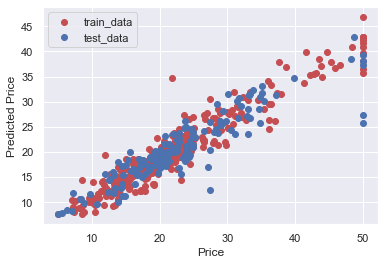

In [139]:
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.scatter(y_train,y_train_pred,color='r',label="train_data")
plt.scatter(y_test,y_test_pred,color='b',label="test_data")
plt.legend()
plt.show()